## Trapezoidal Rule

Text(0.02, 0.7, '$\\int_{-2}^{2} e^{-x^2}dx \\approx 1.75914$')

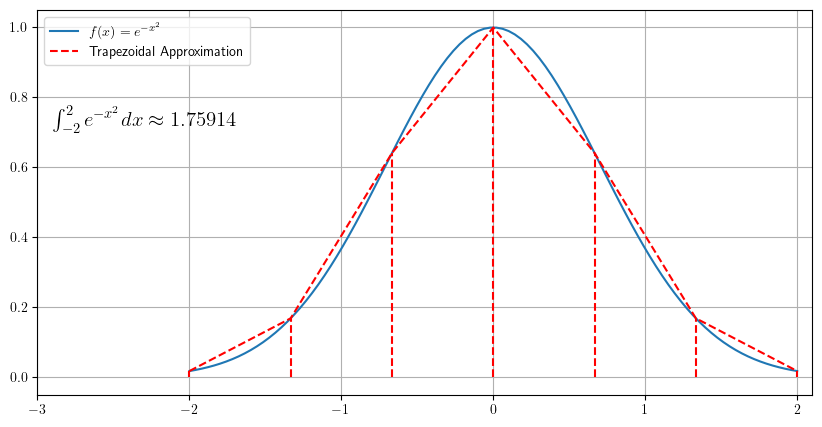

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

def integrateTrap(f,a,b,n):
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    y = f(x)
    return (h/2.0)*(2*sum(y) - (y[0] + y[n]))

def f(x):
    return np.exp(-(x**2))

n = 6; a = -2; b = 2
xplt = np.linspace(a,b,100)
sections = np.linspace(a,b,n+1)
ysections = f(sections)

integral = integrateTrap(f,a,b,n)

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(xplt,f(xplt),label = r'$f(x)=e^{-x^2}$')
plt.plot(sections,ysections,'--',color = 'red',label = 'Trapezoidal Approximation')
plt.vlines(sections,0,ysections,linestyle = 'dashed',color = 'red')
plt.xlim(a-1,b+0.1)
plt.grid()
plt.legend(loc = 2)
plt.text(0.02,0.7,r'$\int_{'+str(a)+r'}'+r'^{'+str(b)+r'} e^{-x^2}dx \approx '+str(np.round(integral,5))+r'$',size = 15,transform = ax.transAxes)

## Simpson's Rule(Quadratic)

In [2]:
import numpy as np
def f(x):
    return x
# Number of intervals n should be an even number 
def Isimp(f,a,b,n):
    if n%2 != 0:
        n = n+1
    h = (b-a)/n
    y = f(np.linspace(a,b,n+1))
    ans = (h/3)*(y[0]+y[n]+4*sum(y[1:n:2])+2*sum(y[2:n-1:2]))
    return ans
print(Isimp(f,0,1,4))
print()

0.5



## Hermite Polynomials $H_n(x)$ using the recurrence relation: $H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)$


### Using recursive function

Flow tree of H(3,x):

    H(3, x)
    ├── H(2, x)
    │   ├── H(1, x) → returns 2x
    │   ├── H(0, x) → returns 1
    │   └── Compute H(2, x) = 4x² - 2
    |
    |── H(1, x) → returns 2x
    └── Compute H(3, x) = 8x³ - 12x

H0(0) =  1
H1(0) =  0
H2(0) =  -2
H3(0) =  0
H4(0) =  12


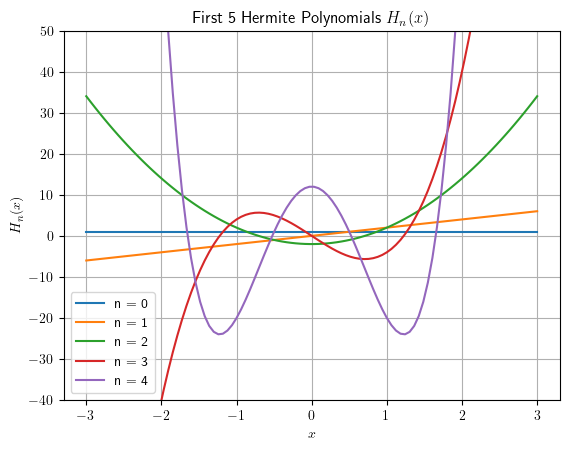

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def H(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    return 2*x*H(n-1,x) - 2*(n-1)*H(n-2,x)

x = np.linspace(-3,3,100)
N = 5

plt.ylim(-40,50)
for n in range(N):
    plt.plot(x,H(n,x),label = 'n = '+str(n))
    print('H'+str(n)+'(0) = ',H(n,0))

plt.ylabel('$H_n(x)$')
plt.xlabel('$x$')
plt.title('First '+str(N)+' Hermite Polynomials $H_n(x)$')
plt.grid()
plt.legend()
plt.show()

### Using loop

H0(0) =  1
H1(0) =  0
H2(0) =  -2
H3(0) =  0
H4(0) =  12


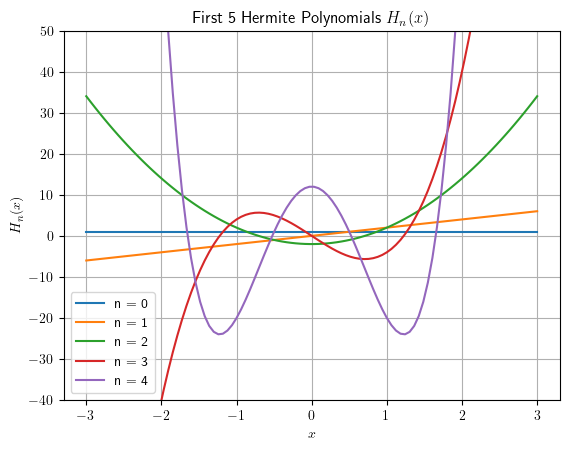

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Hloop(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    Hnminus2 = 1+0*x
    Hnminus1 = 2*x
    for i in range(2,n+1):
        Hn = 2*x*Hnminus1 - 2*(i-1)*Hnminus2
        Hnminus2,Hnminus1 = Hnminus1,Hn
    return Hn

x = np.linspace(-3,3,100)
N = 5

plt.ylim(-40,50)
for n in range(N):
    plt.plot(x,Hloop(n,x),label = 'n = '+str(n))
    print('H'+str(n)+'(0) = ',Hloop(n,0))

plt.ylabel('$H_n(x)$')
plt.xlabel('$x$')
plt.title('First '+str(N)+' Hermite Polynomials $H_n(x)$')
plt.grid()
plt.legend()
plt.show()

### Plot of n = 30 eigenstate of 1-D Quantum Harmonic Oscillator: 

$\psi_n(x) = \frac{1}{\sqrt{2^n n!\sqrt\pi}}e^{-x^2/2}H_{n}(x)$

0:00:00.010000 H_30(x) Calculated using inbuilt function!
0:00:00.001201 H_30(x) Calculated using user defined function!


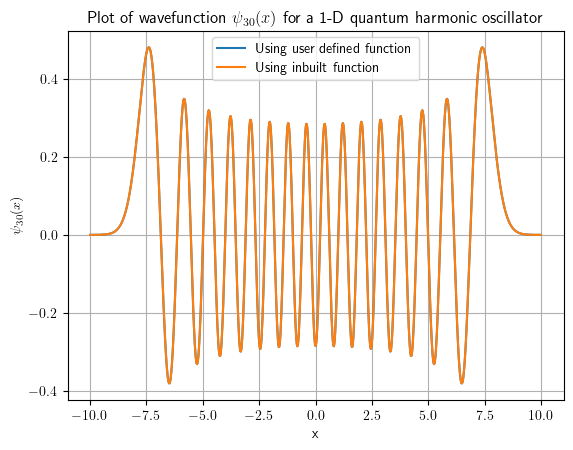

In [5]:
import numpy as np
from scipy import special as sp
import math
from datetime import datetime
import matplotlib.pyplot as plt

'''
def H(n,x):
    if n == 0:
        return 1.0+0.0*x
    elif n == 1:
        return 2.0*x
    return 2.0*x*H(n-1,x) - 2.0*(n-1)*H(n-2,x)
'''
def H(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    Hnminus2 = 1+0*x
    Hnminus1 = 2*x
    for i in range(2,n+1):
        Hn = 2*x*Hnminus1 - 2*(i-1)*Hnminus2
        Hnminus2,Hnminus1 = Hnminus1,Hn
    return Hn

x = np.linspace(-10,10,1000)
n = 30

t = datetime.now()
hermite = sp.hermite(n)
hsp = hermite(x)
t  = datetime.now() - t
print(t,'H_30(x) Calculated using inbuilt function!')
t = datetime.now()
h = H(n,x)
t  = datetime.now() - t
print(t,'H_30(x) Calculated using user defined function!')

psi30sp = np.exp(-(x**2)/2)*hsp/np.sqrt((2**n)*math.factorial(n)*np.sqrt(np.pi))
psi30 = np.exp(-(x**2)/2)*h/np.sqrt((2**n)*math.factorial(n)*np.sqrt(np.pi))

plt.plot(x,psi30,label = 'Using user defined function')
plt.plot(x,psi30sp,label = 'Using inbuilt function')
plt.ylabel('$\psi_{30}(x)$')
plt.xlabel('x')
plt.title('Plot of wavefunction $\psi_{30}(x)$ for a 1-D quantum harmonic oscillator')
plt.grid()
plt.legend()
plt.show()

## Root mean square $\sqrt{\langle x^2 \rangle}$ for 1-D quantum harmonic oscillator (for n = 5 state)

### Plot of $H_7(x)$ for root finding

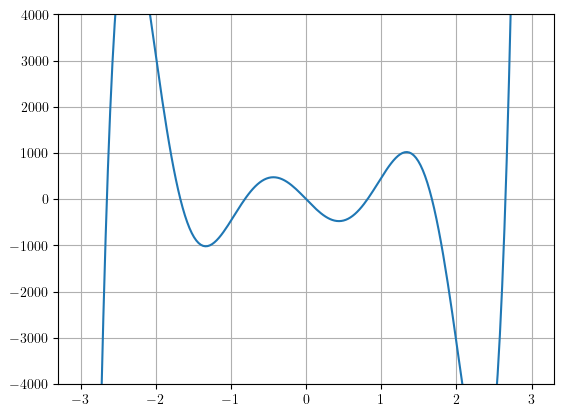

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def H(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    Hnminus2 = 1+0*x
    Hnminus1 = 2*x
    for i in range(2,n+1):
        Hn = 2*x*Hnminus1 - 2*(i-1)*Hnminus2
        Hnminus2,Hnminus1 = Hnminus1,Hn
    return Hn

N = 7
x = np.linspace(-3,3,200)
plt.ylim(-4000,4000)
#plt.xlim(2,3)
plt.plot(x,H(N,x))
plt.grid()
plt.show()


### Integrating using Gauss-Hermite Quadrature with 7 points

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Define nth Hermite Polynomial function
def H(n,x):
    if n == 0:
        return 1+0*x
    elif n == 1:
        return 2*x
    Hnminus2 = 1+0*x
    Hnminus1 = 2*x
    for i in range(2,n+1):
        Hn = 2*x*Hnminus1 - 2*(i-1)*Hnminus2
        Hnminus2,Hnminus1 = Hnminus1,Hn
    return Hn

## Derivative of nth Hermite Polynomial using the relation: H_n'(x) = 2*n*H_n-1(x)
def dH(n,x):
    if n == 0:
        return 0*x
    else:
        return 2*n*H(n-1,x)

## Integrand for computing <x^2> after taking all constants outside the integral
def fint(x):
    return (x*H(5,x))**2

## Number of data points for Gauss Hermite Quadrature
N = 7

## Finding all 7 roots of H7(x) using newton raphson method 
## Roots are of the form 0,+-x0,+-x1,+-x2, symmetric about origin
tol  = 10E-10    
xguesspos = np.array([1,1.5,2.6])    ## Guess values for positive roots
roots = np.array([])
Nmax = 50
for xguess in xguesspos:
    for i in range(Nmax):
        dx = -H(N,xguess)/dH(N,xguess)
        if abs(dx) < tol:
            roots = np.append(roots,xguess)
            break
        xguess += dx
    if i == Nmax:
        roots = np.append(roots,None)

## Make and sort the array of all roots including negative and zero
roots = np.sort(np.concatenate((-roots,np.array([0]),roots)))
## Find corresponding weights
weights = (2**(N-1))*math.factorial(N)*np.sqrt(np.pi)/((N*H(N-1,roots))**2)

I = sum(weights*fint(roots))/((2**5)*math.factorial(5)*np.sqrt(np.pi))
rms = np.sqrt(I)
print('Roots of H7(x): ',roots)
print('Corresponding weights: ',weights)
print('RMS = ',rms)

Roots of H7(x):  [-2.65196136 -1.67355163 -0.81628788  0.          0.81628788  1.67355163
  2.65196136]
Corresponding weights:  [0.00097178 0.05451558 0.42560725 0.81026462 0.42560725 0.05451558
 0.00097178]
RMS =  2.345207879901996


## Gauss-Legendre Quadrature
$$\int_{-1}^1 f(x)\ dx\approx\sum_{k=0}^{N-1}w_k\cdot f(x_k)$$
The roots can be approximated by (further improved by Newton Raphson method):
$$x_k\approx \cos\left(\frac{\pi(k+0.75)}{N+0.5}\right)$$
The weights are:
$$w_k = \frac{2}{(1-x_k^2)[P'_N(x_k)]^2}$$
The legendre polynomial and its derivative is found using the recursive relations:
$$1.\ P_n(x) = \frac{(2n-1)xP_{n-1}(x)-(n-1)P_{n-2}(x)}{n}$$
$$2.\ P'_n(x) = \frac{n(P_{n-1}(x)-xP_n(x))}{(1-x^2)}$$

Roots:  [ 0.9931286   0.96397193  0.91223443  0.83911697  0.74633191  0.63605368
  0.510867    0.37370609  0.22778585  0.07652652 -0.07652652 -0.22778585
 -0.37370609 -0.510867   -0.63605368 -0.74633191 -0.83911697 -0.91223443
 -0.96397193 -0.9931286 ]

Weights:  [0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


Text(0.5, 0, 'Root/Position $x_k$')

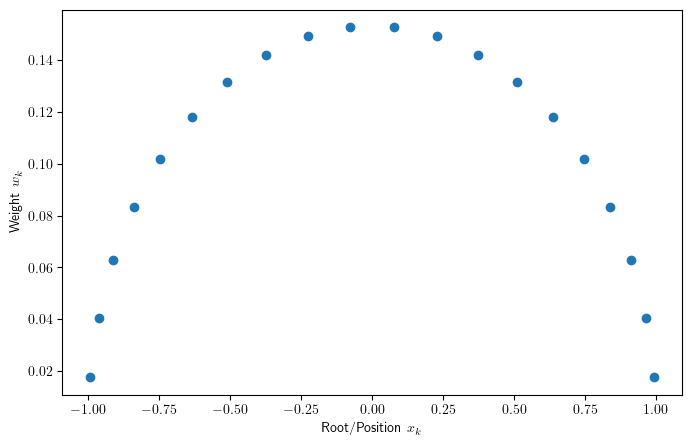

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def gausslegxw(N):
    # Define nth Legendre Polynomial
    def P(n,x):
        if n == 0:
            return 1+0*x
        elif n == 1:
            return x
        Pnminus2 = 1+0*x
        Pnminus1 = x
        for i in range(2,n+1):
            Pn = ((2*i - 1)*x*Pnminus1 - (i - 1)*Pnminus2)/i
            Pnminus1, Pnminus2 = Pn, Pnminus1
        return Pn
    # Define derivative of nth Legendre Polynomial
    def dP(n,x):
        if n == 0:
            return 0*x
        return n*(P(n-1,x) - x*P(n,x))/(1-x**2)
    # Max iteration for stopping the method from diverging
    Nmax = 30
    # tolerance
    tol = 1.0e-14
    # Storing the initial guesses for roots
    xroots = np.cos(np.pi*(np.arange(N)+0.75)/(N+0.25))
    # Iterating over each guess and replacing it with the correct root
    # within the tolerance using Newton Raphson method
    for i in range(N):
        xguess = xroots[i]
        for j in range(Nmax):
            dx = -P(N,xguess)/dP(N,xguess)
            xguess += dx
            if abs(dx) <= tol:
                xroots[i] = xguess
                break
    # Weights for Gauss-Legendre quadrature
    weights = 2/((1-xroots**2)*(dP(N,xroots)**2))
    return xroots,weights

x,w = gausslegxw(20)
print('Roots: ',x)
print('\nWeights: ',w)

plt.figure(figsize = (8,5))
plt.scatter(x,w)
plt.ylabel(r'Weight $w_k$')
plt.xlabel(r'Root/Position $x_k$')

### For general limits of integration $a,b$:
$$\int_{a}^b f(x)\ dx\approx\sum_{k=0}^{N-1}w'_k\cdot f(x'_k)$$
Where
$$x'_k = \frac{b-a}{2}x_k+\frac{b+a}{2},\quad w'_k = \frac{b-a}{2}w_k$$

In [9]:
a = -1.0
b = 1.0
N = 100
x,w = gausslegxw(N)
xp = ((b-a)*x+(b+a))/2
wp = (b-a)*w/2

def f(x):
    return np.exp(-(x**2))

defint = sum(wp*f(xp))
print('Definite Integral = ',1-defint/np.sqrt(np.pi))

Definite Integral =  0.15729920705028488


## Romberg Integration method

In [10]:
import numpy as np

def itrap(f,a,b,num):
    h = (b-a)/num
    x = np.linspace(a,b,num+1)
    y = f(x)
    return (h/2.0)*(2*sum(y) - (y[0] + y[num]))

def f(x):
    return np.sin(x)

def iromberg(f,a,b,n):
    R = np.array([])
    for j in range(n):
        R = np.append(R,itrap(f,a,b,2**j))
    print(R)
    for i in range(1,n):
        R[i:n] = R[i:n] + ((R[i:n] - R[i-1:n-1])/((4**i) - 1))
    print(R)
    return R[n-1],R[n-1] - R[n-2]

a = 0
b = np.pi
n = 5
print(iromberg(f,a,b,n))

[1.92367069e-16 1.57079633e+00 1.89611890e+00 1.97423160e+00
 1.99357034e+00]
[1.92367069e-16 2.09439510e+00 1.99857073e+00 2.00000555e+00
 1.99999999e+00]
(1.9999999945872906, -5.555392379896773e-06)
